<div style="width: 80%;">

<img src="attachment:image.png" width="500" style="float: left">
<div style="clear: both"></div>
<br>

<div style="font-size: 20pt; float: left;">Anwendungen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">FS 2024</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Cédric Huwyler</div>
</div>
<br>

# Minichallenge 1 zum Thema *Hauptkomponentenanalyse*

Diese erste Minichallenge widmet sich dem Thema *Hauptkomponentenanalyse* (*Principal Component Analysis, PCA*). Hier bekommst du Gelegenheit, in einer ersten Aufgabe den Stoff aus dem Skript noch einmal nachzuvollziehen und dann in einer zweiten Aufgabe deine Erkenntnisse praktisch auf ein Datenset aus der Brustkrebsforschung anzuwenden. Am besten liest du entweder vorgängig das Skript oder vervollständigst die erste Aufgabe gleichzeitig mit dem Lesen des Skripts. Rechne zur Bearbeitung dieser Minichallenge durchaus 3-4 Stunden ein, sie ist die längste von allen, aber damit kannst du dich gut noch einmal in Numpy vertiefen, bevor du dich dann an die weitere Minichallenges machst, die durch das erarbeitete Wissen sehr viel einfacher sein werden.

Die PCA ist eine einfache Methode des *Unsupervised Learning*, ein Teilfeld des Machine Learning wo keine Zielvariable vorliegt und ohne diese trotzdem etwas über die Struktur der Daten gelernt werden soll. Die PCA wirst du in der Kompetenz *Grundlagen des Machine Learning* wieder antreffen und vertiefen.

**Musterlösung:**

Zu dieser Minichallenge existiert (bewusst) keine Musterlösung. Wir werden sie aber zusammen besprechen und du kannst sie gerne zur Durchsicht und Kommentierung uns entweder in einer der Sprechstunden vorstellen oder mit deinen Mitstudierenden darüber diskutieren.

Wir laden zuerst alle benötigten Python-Bibliotheken:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Aufgabe 1: Resultate auf Beispieldatensätzen nachvollziehen

In Aufgabe 1 sollst du die Rechenschritte im Skript nachvollziehen und insbesondere verstehen, wie die Konzepte von einerseits Eigenwerten und Eigenvektoren und andererseits einer Kovarianz- bzw. Korrelationsmatrix natürlich zum Werkzeugt der PCA/Hauptkomponentenanalyse führen. Ebenfalls entwickelst du Tools und Codestücke, die dir nachher die Beantwortung der Fragen in Aufgabe 2 stark vereinfachen. Aufgabe 1 kann ganz gut gleich während dem Lesen des Skripts Schritt für Schritt gelöst werden - genauso aber erst nach einer ersten Lektüre.

Zum Start definieren wir gleich die drei Datensätze aus dem Skript, damit du diese nicht mehr einlesen musst:

In [107]:
X1 = np.array([[0.51, 0.87],[0.77, 0.11],[0.87, 0.3 ],[0.01, 0.47],[0.31, 0.67],[0.96, 0.26],[0.51, 0.7 ],
               [0.32, 0.66],[0.54, 0.18],[0.22, 0.32],[0.81, 0.89],[0.34, 0.08],[0.54, 0.75],[0.01, 0.06],
               [0.67, 0.73],[0.21, 0.74],[0.93, 0.41],[0.37, 0.99],[0.75, 0.45],[0.76, 0.19]])

X2 = np.array([[0.51, -1.08],[0.77, -2.01],[0.87, -2.03],[0.01, 0.19],[0.31, -0.37],[0.96, -1.6],
               [0.51, -1.16],[0.32, -0.89],[0.54, -0.85],[0.22, -0.22],[0.81, -1.61],[0.34, -0.68],
               [0.54, -1.42],[0.01, -0.07],[0.67, -1.01],[0.21, -0.65],[0.93, -1.98],[0.37, -0.78],
               [0.75, -1.58],[0.76, -1.97]])

X3 = np.array([[0.08,  0.1],[0.78, 0.78],[0.44, 0.45],[0.72, 0.66],[0.98, 1.05],[0.54, 0.55],[0.5, 0.48],
               [0.07, 0.15],[0.27, 0.27],[0.5, 0.44],[0.68, 0.66],[0.8, 0.71],[0.38, 0.42],[0.07, 0.05],
               [0.29, 0.26],[0.91, 0.95],[0.21, 0.14],[0.45, 0.47],[0.93, 0.85],[0.02, -0.01]]
)
X1.shape, X2.shape, X3.shape

((20, 2), (20, 2), (20, 2))

### a) Kovarianzmatrizen bestimmen

Bestimme als erstes wie im Skript die Kovarianzmatrizen `C1`, `C2` und `C3` der drei oben definierten Datensets. Vergiss nicht, für die Berechnung vorgängig den Mittelwert der einzelnen Spalten von `X` abzuziehen (Benutze hier geschickt den `axis`-Parameter von `np.mean()`). Vergleiche deine Resultate mit denjenigen im Skript.

In [108]:
# DEIN CODE
def calc_cov(X):
    mean_X = np.mean(X, axis=0)
    X_ = (X-mean_X)
    C = (1/(len(X)-1)) * X_.T @ X_
    print (C)

    return C



C1 = calc_cov(X1)


[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]]


### b) Korrelationsmatrizen bestimmen

Bestimme auch Korrelationsmatrizen `R1`, `R2` und `R3` zu den drei Datensets, indem du ebenfalls die einzelnen Spalten von `X` geeignet vorbereitest (siehe Skript).

**Hinweis:** Achtung, `np.std()` teilt standarmässig durch $n$ (Anzahl Datenpunkte). Statistisch korrekt muss hier aber durch $n-1$ geteilt werden. Dies kannst du erreichen, indem du das Argument `ddof=1` setzt (ddof = degrees of freedom, mehr dazu später in der Kompetenz *Statistical Learning*).

In [109]:
# DEIN CODE
def calc_cor(X):

    C = calc_cov(X)
    
    # Berechne die Standardabweichungen aus der Diagonale der Kovarianzmatrix
    std = np.sqrt(np.diag(C))
    
    # Berechne die Korrelationsmatrix
    R = C / np.outer(std, std)
    
    print(f"Korrelationsmatrix:\n{R} \n")

    return R


R1 = calc_cor(X1)





# def calc_cor_(C):
#     # Berechne die Standardabweichungen aus der Diagonale der Kovarianzmatrix
#     std = np.sqrt(np.diag(C))
    
#     # Berechne die Korrelationsmatrix
#     R = C / np.outer(std, std)
    
#     print(f"Korrelationsmatrix:\n{R} \n")

#     return R

# R1 = calc_cor_(C1)

[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]]
Korrelationsmatrix:
[[ 1.         -0.06220673]
 [-0.06220673  1.        ]] 



### c) Eigenwerte und Eigenvektoren bestimmen

Nun möchten wir die Eigenwerte und Eigenvektoren der berechneten Kovarianzmatrizen bestimmen. `np.linalg.eig()` gibt die Eigenwerte und die dazugehörigen Eigenvektoren unsortiert zurück, für Probleme weiter unten ist es aber von Vorteil, wenn die Eigenwerte (und die dazugehörigen Eigenvektoren) **absteigend nach Eigenwertsbetrag sortiert sind**. Schreibe eine Funktion `sorted_eig()`, die die Resultate aus `np.linalg.eig()` nimmt, entsprechend sortiert und im gleichen Stil wie `np.linalg.eig()` zurückgibt (Liste mit zwei Arrays). 

**Achtung: Die Funktion soll für beliebige (nxn)-Matrixen funktionieren und keine if-Bedingungen enthalten!** 

Investiere ruhig ein bisschen Zeit, um die Rückgabewerte von `np.linalg.eig()` genügend zu verstehen. 

In [110]:
def calc_sorted_eig( M ):
    
    ew, ev = np.linalg.eig(M)

    # Sortiere Indizes basierend auf den Eigenwerten in absteigender Reihenfolge
    idx = ew.argsort()[::-1]
    
    # Sortiere Eigenwerte und Eigenvektoren
    ew_sorted = ew[idx]
    ev_sorted = ev[:, idx]
    
    return ew_sorted, ev_sorted



ew1, ev1 = calc_sorted_eig(C1)
ew1, ev1

(array([0.09147316, 0.08049263]),
 array([[ 0.62207473, -0.78295787],
        [-0.78295787, -0.62207473]]))

[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]]
[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]]
Korrelationsmatrix:
[[ 1.         -0.06220673]
 [-0.06220673  1.        ]] 



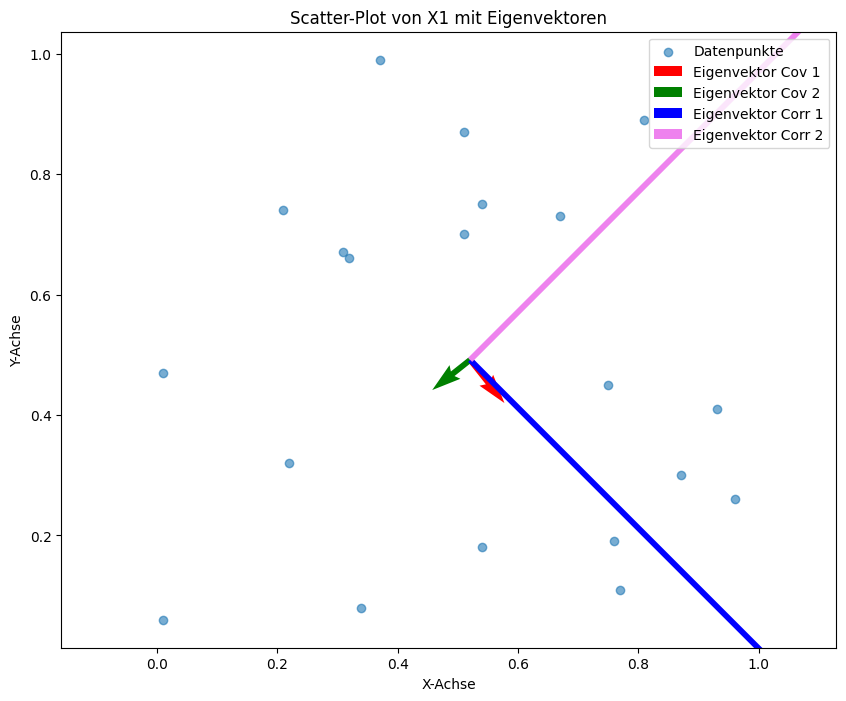

In [111]:
# Visualisierung
def viz_scatter_X_ew_C_vs_R(X):
    x = X[:, 0]  # x-Koordinaten
    y = X[:, 1]  # y-Koordinaten

    plt.figure(figsize=(10, 8))  # Größere Figur für bessere Sichtbarkeit
    plt.scatter(x, y, alpha=0.6, label='Datenpunkte')  # Scatter-Plot mit Transparenz

    C = calc_cov(X)
    ew_ev_C = calc_sorted_eig(C)

    R = calc_cor(X)
    ew_ev_R = calc_sorted_eig(R)
   
    # Eigenvektoren Kovarianzmatrix als Linien darstellen
    for i in range(2):  # Für 2D-Daten
        ev = ew_ev_C[1][:, i]  # i-ter Eigenvektor
        ew = ew_ev_C[0][i]     # i-ter Eigenwert
        plt.quiver(np.mean(x), np.mean(y), ev[0], ev[1], 
                angles='xy', scale_units='xy', scale=1/ew, 
                color=['r', 'g'][i], label=f'Eigenvektor Cov {i+1}')
    
    # Eigenvektoren Korrelationsmatrix als Linien darstellen
    for i in range(2):  # Für 2D-Daten
        ev = ew_ev_R[1][:, i]  # i-ter Eigenvektor
        ew = ew_ev_R[0][i]     # i-ter Eigenwert
        plt.quiver(np.mean(x), np.mean(y), ev[0], ev[1], 
                angles='xy', scale_units='xy', scale=1/ew, 
                color=['b', 'violet'][i], label=f'Eigenvektor Corr {i+1}')

    plt.xlabel('X-Achse')
    plt.ylabel('Y-Achse')
    plt.title('Scatter-Plot von X1 mit Eigenvektoren')
    plt.legend()
    plt.axis('equal')  # Gleiche Skalierung für beide Achsen
    plt.grid(False)

    plt.show()

scatter_1 = viz_scatter_X_ew_C_vs_R(X1)

[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]]


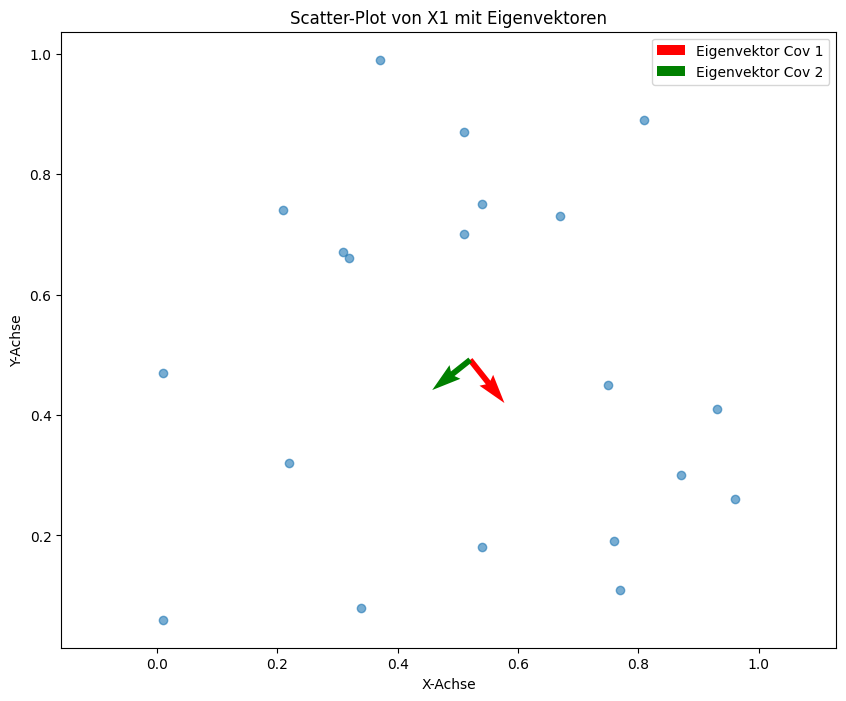

In [112]:
# Visualisierung
def viz_scatter_X_ew_C(X):
    x = X[:, 0]  # x-Koordinaten
    y = X[:, 1]  # y-Koordinaten

    plt.figure(figsize=(10, 8))  # Größere Figur für bessere Sichtbarkeit
    plt.scatter(x, y, alpha=0.6)  # Scatter-Plot mit Transparenz

    C = calc_cov(X)
    ew_ev_C = calc_sorted_eig(C)

       
    # Eigenvektoren Kovarianzmatrix als Linien darstellen
    for i in range(2):  # Für 2D-Daten
        ev = ew_ev_C[1][:, i]  # i-ter Eigenvektor
        ew = ew_ev_C[0][i]     # i-ter Eigenwert
        plt.quiver(np.mean(x), np.mean(y), ev[0], ev[1], 
                angles='xy', scale_units='xy', scale=1/ew, 
                color=['r', 'g'][i], label=f'Eigenvektor Cov {i+1}')
    


    plt.xlabel('X-Achse')
    plt.ylabel('Y-Achse')
    plt.title('Scatter-Plot von X1 mit Eigenvektoren')
    plt.legend()
    plt.axis('equal')  # Gleiche Skalierung für beide Achsen
    plt.grid(False)

    plt.show()

scatter_1 = viz_scatter_X_ew_C(X1)

Du kannst deine Resultate gerne mit folgender Funktion allgemein auf Korrektheit prüfen:

In [113]:
def test_sorted_eig( M ):
    ew, ev = calc_sorted_eig( M )
    if not np.all( np.diff( ew ) <= 0 ):
        raise Exception("Eigenwerte sind nicht absteigend nach Betrag sortiert!")
    if not np.all( np.isclose( M.dot(ev) / (ev*ew) , 1 ) ):
        raise Exception("Eigenvektoren nd nicht korrrekt den Eigenwerten zugeordnet!")
        
    return True

In [114]:
# DEIN CODE
test = test_sorted_eig(ev1)
test

True

Bestimme nun die Eigenwerte und Eigenvektoren von C1, C2 und C3 und speichere sie in `ew1`/`ev1`, `ew2`/`ev2` und `ew3`/`ev3`:

In [115]:
# DEIN CODE
ew1, ev1 = calc_sorted_eig(C1)
ew2, ev2 = calc_sorted_eig(C2)
ew3, ev3 = calc_sorted_eig(C3)

### d) Kovarianzmatrizen diagonalisieren

Benutze nun deine Resultate aus c), um die drei Kovarianzmatrizen `C1`, `C2` und `C3` zu diagonalisieren. Welche Werte erwartest du auf der Diagonalen? Bekommst du diese Werte als Resultat?

In [116]:
#calculate the diagonalised covariance matrix
def diag_cov_matrix(ew):
    D = np.diag(ew)
    D = np.round(D, 4)
    print(f"Diagonalised covariance matrix zu: \n{D}\n")
    return D


C1_diag = diag_cov_matrix(ew1)
C2_diag = diag_cov_matrix(ew2)
C3_diag = diag_cov_matrix(ew3)


Diagonalised covariance matrix zu: 
[[0.0915 0.    ]
 [0.     0.0805]]

Diagonalised covariance matrix zu: 
[[0.5332 0.    ]
 [0.     0.0093]]

Diagonalised covariance matrix zu: 
[[0.1879 0.    ]
 [0.     0.0011]]



Diagonalisierte Matrix C1_diag:
[[0.0915 0.    ]
 [0.     0.0805]]

Eigenwerte von C1:
[0.08049263 0.09147316]


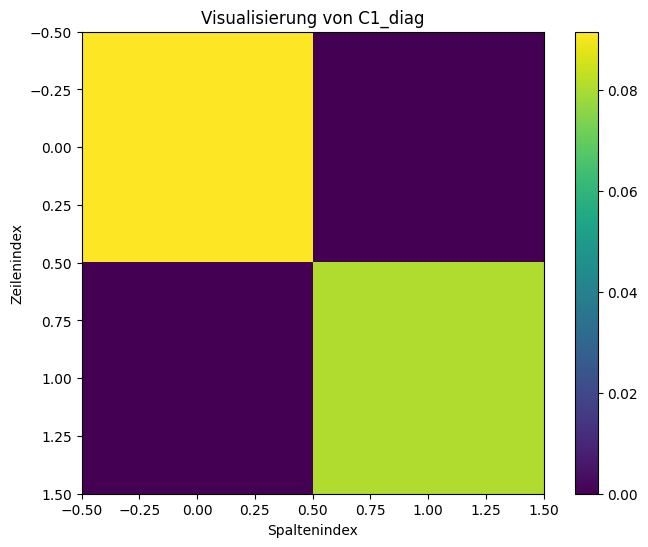

In [117]:

print("Diagonalisierte Matrix C1_diag:")
print(C1_diag)

# Überprüfen Sie, ob die Diagonalelemente den Eigenwerten entsprechen
eigenwerte, _ = np.linalg.eig(C1)
print("\nEigenwerte von C1:")
print(eigenwerte)

# Visualisierung der diagonalisierten Matrix
plt.figure(figsize=(8, 6))
plt.imshow(C1_diag, cmap='viridis')
plt.colorbar()
plt.title("Visualisierung von C1_diag")
plt.xlabel("Spaltenindex")
plt.ylabel("Zeilenindex")
plt.show()

### e) Varianzanteile bestimmen

Im Skript hast du gesehen, dass aus den Eigenwerten die Anteile der neuen (Haupt-)Komponenten an der totalen Varianz abgelesen werden können. Bestimme für alle drei Datensets die Verteilung der Varianzanteile, indem jeweils den prozentualen Anteil der Eigenwerte an der Gesamtsumme bestimmst, indem du durch die Gesamtsumme dividierst.

In welchem Datenset ist die Varianz ungefähr gleich verteilt, in welchem Datenset ist sie am stärksten ungleich verteilt? Was bedeutet es für die späteren Hauptkomponenten, wenn die Varianz ungleich verteilt ist?

In [118]:
# calculate the alpha 1+2 and check if they add up to 100% aka 1
def varianzanteile(eigenvalues):
    total_var = np.sum(eigenvalues)
    var_anteile = eigenvalues / total_var * 100

    alpha_1 = round(var_anteile[0,0], 1) #auf die erste Dezimalstelle gerundet
    alpha_2 = round(var_anteile[1,1], 1) #auf die erste Dezimalstelle gerundet

    is_valid = True if (alpha_1+alpha_2) == 100 else False

    print(f"The varaince ist {is_valid} \n Alpha1: {alpha_1}% \n Aplpha2: {alpha_2}%")
    return alpha_1, alpha_2

 
C1_var = varianzanteile(C1_diag)
C2_var = varianzanteile(C2_diag)
C3_var = varianzanteile(C3_diag)



The varaince ist True 
 Alpha1: 53.2% 
 Aplpha2: 46.8%
The varaince ist True 
 Alpha1: 98.3% 
 Aplpha2: 1.7%
The varaince ist True 
 Alpha1: 99.4% 
 Aplpha2: 0.6%


### f) Daten transformieren und visualisieren

Als letztes möchtest du eine komplette Hauptkomponentenanalyse der drei Datensätze durchführen. Wie im Skript angemerkt, werden typischerweise für eine Hauptkomponentenanalyse nur standardisierte Daten verwendet. Sind die Daten standardisiert, so reduziert sich die Kovarianzmatrix auf die Korrelationsmatrix.

Berechne damit also zuerst die (sortierten) Eigenwerte und Eigenvektoren der *Korrelationsmatrizen* `R1`, `R2` und `R3` und erzeuge die Matrizen `V1`, `V2` und `V3`, die die gestapelten Eigenvektoren dieser drei Matrizen enthalten:

In [119]:
# DEIN CODE
def calc_PCA(X):
    #Kovariamzmatrix bestimmen
    mean_X = np.mean(X, axis=0)
    X_ = (X-mean_X)
    C = (1/(len(X)-1)) * X_.T @ X_
       
    #Korrelationsmatrix bestimmen
    std = np.sqrt(np.diag(C))
    R = C / np.outer(std, std)
    
    #soriterte ew, ev bestimmen
    ew, ev = np.linalg.eig(R)
    idx = ew.argsort()[::-1] #Indizes absteigend sortiert
    ew_sorted = ew[idx]# Sortiere Eigenwerte und Eigenvektoren
    ev_sorted = ev[:, idx]
    
   #V erstellen
    V = np.vstack(ev_sorted)

    print(f"Korrelationsmatrix:\n{R}\n\nV:\n{V}\n\nEigenvekotren:\n{ev_sorted}\n\nEigenwerte:\n{ew_sorted}")

    return R, V, ev_sorted, ew_sorted


R1, V1, ev1, ew1 = calc_PCA(X1)


Korrelationsmatrix:
[[ 1.         -0.06220673]
 [-0.06220673  1.        ]]

V:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenvekotren:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenwerte:
[1.06220673 0.93779327]


Transformiere nun die (standardisierten) Datensätze mit

$$
W = X V,
$$

wobei $X$ die Matrix mit den standardisierten Daten, $V$ die Matrix mit den Eigenvektoren der Korrelationsmatrix und $W$ die Matrix mit den Daten mit den neuen Hauptkomponenten darstellen. Später werden wir übrigens diese Transformation als *Transformation in die Eigenbasis der Korrelationsmatrix* bezeichnen.

In [120]:
# DEIN CODE
W1 = R1@V1
W1

array([[ 0.75109358,  0.66311998],
       [-0.75109358,  0.66311998]])

Stelle die beiden ersten Spalten von $W$ (=erste zwei Hauptkomponenten) mit Matplotlib graphisch in einem Scatterplot einander gegenüber. Was erwartest du? Kommt heraus, was du erwartet hast?

**Hinweis:** Damit du den Unterschied siehst, setzst du am besten jeweils `plt.ylim(-2,2)`.

In [121]:
# DEIN CODE


## Aufgabe 2: PCA von Brustkrebsdaten

Im zweiten Teil dieser Minichallenge wollen wir uns mit realistischen Daten beschäftigen. Im Rahmen einer Brustkrebsstudie von 1995 wurden Zellkerne aus entnommenem Gewebe analysiert und gleichzeitig das Wachstum des Tumors (gutartig = benign, bösartig = malignant) untersucht. Es wurden jeweils 10 Attribute wie Radius, Textur, Fläche, fraktale Dimension .. der verschiedenen Zellkerne eines Samples gemessen (siehe Beschreibung des Datensets) und jeweils pro Probe drei statistische Masse dieser 10 Attribute berechnet: Durchschnitt (*mean*), Streuung (*standard error*) und schlechtester bzw. grösster Wert (*worst*). Mit diesen drei Massen pro Attribut führt das zu insgesamt 30 Attributen (oder Features wie wir sie im Machine Learning nennen), die in unsere Auswertung eingehen und aus denen allenfalls Rückschlüsse gezogen werden können, ob der Tumor gut- oder bösartig ist.

Im Folgenden lesen wir zuerst einmal das Datenset ein:

In [122]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Beschreibung:

In [123]:
print( cancer.DESCR )

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

30 Attribute:

In [124]:
df = pd.DataFrame( cancer.data, columns=cancer.feature_names )
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Zielvariable (0=bösartig, 1=gutartig):

In [125]:
target = np.where( cancer.target==0, "malign", "benign" )
target[:30]

array(['malign', 'malign', 'malign', 'malign', 'malign', 'malign',
       'malign', 'malign', 'malign', 'malign', 'malign', 'malign',
       'malign', 'malign', 'malign', 'malign', 'malign', 'malign',
       'malign', 'benign', 'benign', 'benign', 'malign', 'malign',
       'malign', 'malign', 'malign', 'malign', 'malign', 'malign'],
      dtype='<U6')

In [126]:
np.unique( target, return_counts=True )

(array(['benign', 'malign'], dtype='<U6'), array([357, 212]))

62.7% der Tumore im Datenset sind gutartig!

Features / Attribute:

### a) Korrelationsmatrix berechnen und visualisieren

Hier möchten wir gleich wie in Aufgabe 1 vorgehen. Zuerst ziehen wir aber eine Matrix mit den Daten aus dem Data Frame:

In [127]:
X = df.to_numpy()
X.shape

(569, 30)

`X` enthält die Daten von 569 Untersuchungen mit den jeweils 30 Attributen. Eine Visualisierung dieses hochdimensionalen Datensatzes ist sehr schwierig, wenn nicht unmöglich. Möchten wir alle Variablen gegeinander aufplotten, so müssen wir $\frac{30\times30}{2} - 30 = 420$ Plots anschauen! Das wird natürlich schwierig. Um trotzdem die im Datenset enthaltenen Zusammenhänge etwas verstehen zu können, schauen wir uns als Erstes die Korrelationsmatrix an.

Berechne diese mit den gleichen Mitteln wie in Aufgabe1:

In [128]:
# DEIN CODE


Benutze die folgende Funktion, um sie zu visualisieren (bereits für dich implementiert):

In [129]:
def corrmat( R ):
    plt.figure(figsize=(10,10))
    plt.matshow( R, cmap="bwr", fignum=1, vmin=-1, vmax=1 )
    plt.colorbar( fraction=0.02 )
    plt.xticks( np.arange(0,30) )
    plt.gca().set_xticklabels( df.columns, rotation=90 )
    plt.yticks( np.arange(0,30) )
    plt.gca().set_yticklabels( df.columns )

In [130]:
# DEIN CODE


Wie schätzt du die Zusammenhänge zwischen den einzelnen Variablen ein? Generell gross oder klein? Je grösser, desto eher kannst du später den Datensatz mit nur wenigen Hauptkomponenten fast gleich gut erklären.

### b) Eigenwerte und Eigenvektoren berechnen

Bestimme nun alle Eigenwerte und Eigenvektoren der in a) berechneten Korrelationsmatrix. Benutze dazu deine Funktion `sorted_eig()` aus Aufgabe 1.

In [131]:
# DEIN CODE

### c) Scree-Plot mit Varianzanteilen erstellen

Nun möchten wir ebenfalls die Varianzanteile aus den Eigenwerten wie aus Aufgabe 1e) berechnen. Statt zwei Prozentzahlen solltest du jetzt aber 30 absteigende Prozentzahlen bekommen:

In [132]:
# DEIN CODE

Stelle die Varianzanteile graphisch dar, indem du auf der $x$-Achse Werte von 1-30 (die 30 Hauptkomponenten) und auf der $y$-Achse die Varianzanteile mit `plt.plot()` plottest. Du solltest einen abfallenden Plot bekommen, den sogenannten *Scree-Plot*.

In [133]:
# DEIN CODE

Oft möchte man nur die ersten $k$ Hauptkomponenten benutzen, die zusammen zum Beispiel 90% der Varianz in den Daten erklären können. Erstelle dazu einen **kumulativen** Scree-Plot, indem du `np.sum()` durch `np.cumsum()` ersetzst.

In [134]:
# DEIN CODE 

Lese damit die Antwort auf folgende zwei Fragen ab: 
* Wieviele Hauptkomponenten brauchst du, um 90% der Varianz zu erklären?
* Wieviele Prozent der Varianz erklären die ersten beiden Hauptkomponenten ungefähr?

### d) Hauptkomponenten berechnen und visualisieren

Berechne nun die Hauptkomponentendarstellung wie im Skript beschrieben über

$$
W = X \, V.
$$

Stelle sicher, dass $W$ die gleichen Dimensionen hat wie $X$ und dass du die **standardskalierte** Version von $X$ verwendest.

0.44272025607526344 0.18971182044033086


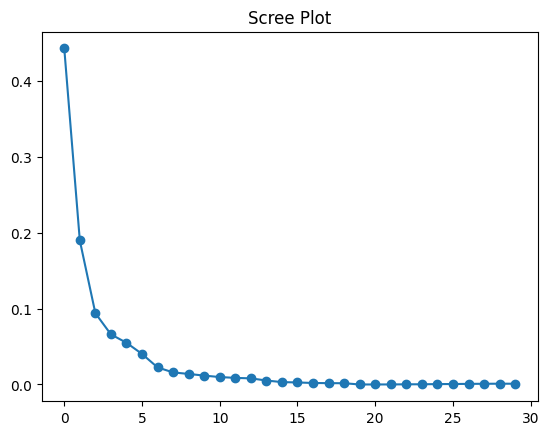

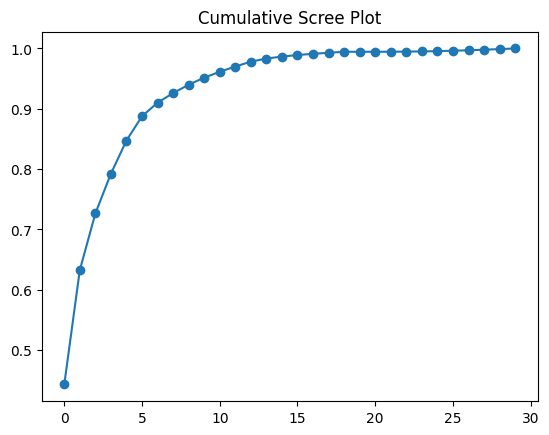

array([ 1.41142445e+00,  2.86563545e-02,  5.41452147e-01,  3.05342182e+00,
       -1.22649464e+00, -4.51038652e-01, -1.28948434e-01, -1.25703919e+00,
        5.59544728e-01, -7.23908740e-01,  1.27331839e-01,  7.64866638e-01,
        2.59457124e+00,  1.00766011e+00, -3.49716238e-01,  4.95777979e-01,
       -7.62191018e-01, -7.52489311e-01, -1.13768885e+00, -4.86367811e-02,
        4.30841253e-01, -7.70068348e-01,  3.02304386e+00, -5.95840433e-01,
       -8.12879620e-01,  1.18420148e+00,  7.87357336e-01, -9.07595060e-01,
        1.92848770e-01,  3.62598238e-02,  2.42080347e-01,  1.23467940e+00,
       -1.91007567e-01,  2.67478979e-01,  1.00178652e+00,  2.01103566e+00,
        5.68595013e-01,  2.90268921e-01, -1.49445639e+00, -1.03735086e+00,
        9.29112483e-01, -2.12263845e+00,  4.31109372e+00,  2.42781694e-01,
        1.10146200e-01,  4.23904812e-01,  5.75926760e-01, -2.82109628e-01,
       -6.93491730e-01,  5.45283917e-01,  2.66247883e-01, -2.56538737e-01,
        6.29890885e-01,  

In [139]:
# DEIN CODE
def sorted_eig(M):
    eigenvalues, eigenvectors = np.linalg.eig(M)
    return eigenvalues, eigenvectors

def simplePCA(A):
    arrayList = []
    sdList = []
    #Getting mean and standard deviance for normalizing data
    for i in range(0, len(A[0])):
        arrayList.append(np.mean(A[:, i]))
        sdList.append(np.std(A[:, i]))

    #normalized data
    S = (A - np.array(arrayList)) / np.array(sdList)

    #calculate correlation matrix (if not normalized this formula can be used to get the Covariance matrix)
    corr = (np.transpose(S) @ S) / (S.shape[0]-1)

    #get eigenvectors from corr
    ew, ev = sorted_eig(corr)
    V = sorted_eig(corr)[1]

    listOfOdds = []
    for i in range(0, len(A[0])):
        listOfOdds.append((ew[i] / sum(ew)))

    #this is the actual PCA in the end
    W = S @ V

    #"Gesamtvarianz"
    chance1l1, chance1l2 = ew[0] / sum(ew), ew[1] / sum(ew)
    print(chance1l1, chance1l2)

    #Scree Plots to visualize loss
    cumListOfOdds = np.cumsum(listOfOdds)
    plt.plot(np.arange(0, len(A[0])), listOfOdds)
    plt.scatter(np.arange(0, len(A[0])), listOfOdds)
    plt.title("Scree Plot")
    plt.show()

    plt.plot(np.arange(0, len(A[0])), cumListOfOdds)
    plt.scatter(np.arange(0, len(A[0])), cumListOfOdds)
    plt.title("Cumulative Scree Plot")
    plt.show()

    return W


W = simplePCA(X)

data_5 = W[:,5]
data_5


Stelle nun die ersten beiden Hauptkomponenten (erste zwei Spalten von $W$) in einem Scatterplot einander gegenüber. Färbe dabei die einzelnen Punkte so ein, dass erkennbar ist, ob der Tumor gut- oder bösartig war. Was denkst du, könnte ein Machine Learning - Modell gut aus der Gewebeprobe die Bösartigkeit eines Tumors beurteilen? Wieviele Hauptkomponenten braucht es zu einer guten Vorhersage?

**Hinweis:** Entsprechende Farben für `plt.scatter()` kannst du folgendermassen erstellen:

In [136]:
target_color = np.where(target=="malign", "red", "green")

In [137]:
# DEIN CODE
def calc_PCA(X):

    #Kovariamzmatrix bestimmen
    mean_X = np.mean(X, axis=0)
    X_ = (X-mean_X)
    C = (1/(len(X)-1)) * X_.T @ X_
       
    #Korrelationsmatrix bestimmen
    std = np.sqrt(np.diag(C))
    R = C / np.outer(std, std)
    
    #soriterte ew, ev bestimmen
    ew, ev = np.linalg.eig(R)
    idx = ew.argsort()[::-1] #Indizes absteigend sortiert
    ew_sorted = ew[idx]# Sortiere Eigenwerte und Eigenvektoren
    ev_sorted = ev[:, idx]
    
   #V erstellen
    V = ev_sorted   # np.vstack nicht nötig, das ev_sorted bereits eine nxn-Matrix ist

    print(f"Kovarianzmatrx:\n{C}\n   Korrelationsmatrix:\n{R}\n\n    V:\n{V}\n\n    Eigenvekotren:\n{ev_sorted}\n\n   Eigenwerte:\n{ew_sorted}")

    return C, R, V, ev_sorted, ew_sorted


C1, R1, V1, ev1, ew1 = calc_PCA(X)



Kovarianzmatrx:
[[ 1.24189201e+01  4.90758156e+00  8.54471417e+01  1.22448341e+03
   8.45445983e-03  9.41970568e-02  1.90127582e-01  1.12475116e-01
   1.42731729e-02 -7.75370629e-03  6.63650325e-01 -1.89188600e-01
   4.80354973e+00  1.17968162e+02 -2.35533633e-03  1.30005142e-02
   2.06588280e-02  8.17956306e-03 -3.03898170e-03 -3.97624858e-04
   1.65137495e+01  6.43310002e+00  1.14288570e+02  1.88822722e+03
   9.62462515e-03  2.29249204e-01  3.87386440e-01  1.72392739e-01
   3.57457580e-02  4.49735060e-04]
 [ 4.90758156e+00  1.84989087e+01  3.44397592e+01  4.85993787e+02
  -1.41477877e-03  5.37668058e-02  1.03692344e-01  4.89769268e-02
   8.41887566e-03 -2.32115824e-03  3.29037393e-01  9.16695072e-01
   2.44944877e+00  5.08408652e+01  8.54099045e-05  1.47865987e-02
   1.86039300e-02  4.34837964e-03  3.24506954e-04  6.19772637e-04
   7.32926700e+00  2.41101485e+01  5.17459332e+01  8.41283832e+02
   7.61106975e-03  1.88010026e-01  2.70110082e-01  8.34908538e-02
   2.79419949e-02  9.2601

### e) Hauptkomponenten interpretieren

Zum Schluss möchten wir die gefundenen Hauptkomponenten noch zu interpretieren versuchen. Das ist nicht immer einfach, da die resultierenden Hauptkomponenten aus vielen der eingehenden Atrribute aus $X$ zusammengemischt sind.
Erstelle dazu pro Hauptkomponente $k$ (entspricht der Spalte $\mathbf{w}_k$ aus $W$) einen Barplot mit `plt.bar()`, der auf der $x$-Achse die Feature-Namen enthält (aus `df.columns`) und auf der $y$-Achse die Werte des $k$-ten Spaltenvektors aus $V$ (Theorie dazu siehe Skript). Konzentriere dich auf die ersten 7 Hauptkomponenten. Verschaffe dir eine Übersicht, welche Variablen in den einzelnen Hauptkomponenten dominieren.

In [ ]:
# DEIN CODE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def create_scree_plot(X):
    # PCA durchführen
    pca = PCA()
    pca.fit(X)
    
    # Erklärte Varianz berechnen
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Scree-Plot erstellen
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2)
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-', linewidth=2)
    plt.title('Scree-Plot')
    plt.xlabel('Hauptkomponente')
    plt.ylabel('Erklärte Varianz')
    plt.axhline(y=0.9, color='g', linestyle='--')
    plt.legend(['Einzelne erklärte Varianz', 'Kumulative erklärte Varianz', '90% Schwelle'])
    plt.show()


test = create_scree_plot(X1)
test
# Verwendung der Funktion
# X sollte Ihre Datenmatrix sein
# create_scree_plot(X)
